# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table')
if table:
    df = pd.read_html(str(table))[0]

    #  Print or process the extracted data
    print(df)
else:
    print("No table found on the page.")

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

# Loop through the scraped data to create a list of rows
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send an HTTP request to the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)

# Step 2: Check if the request was successful (status code 200)
if response.status_code == 200:
    # Step 3: Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Step 4: Find the table on the page
    table = soup.find('table')

    # Step 5: Create an empty list to store rows
    rows_list = []

    # Step 6: Loop through the rows of the table and append them to the list
    if table:
        for row in table.find_all('tr')[1:]:  # Skip the header row
            columns = row.find_all('td')
            row_data = {
                'id': columns[0].text,
                'terrestrial_date': columns[1].text,
                'sol': columns[2].text,
                'ls': columns[3].text,
                'month': columns[4].text,
                'min_temp': columns[5].text,
                'pressure': columns[6].text,
            }
            rows_list.append(row_data)

        # Step 7: Convert the list of rows to a Pandas DataFrame
        df = pd.DataFrame(rows_list)

        # Step 8: Print or process the DataFrame
        print(df)
    else:
        print("No table found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
print("Original Data Types:")
print(df.dtypes)

# Step 10: Convert data types if necessary
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Step 11: Print the updated data types
print("\nUpdated Data Types:")
print(df.dtypes)

Original Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [9]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"\n1. Number of months on Mars: {num_months}")


1. Number of months on Mars: 12


In [10]:
# 2. How many Martian days' worth of data are there?
num_sol_days = df['sol'].nunique()
print(f"2. Number of Martian days worth of data: {num_sol_days}")

2. Number of Martian days worth of data: 1867


In [12]:
# 3. What is the average low temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
average_min_temp_by_month

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

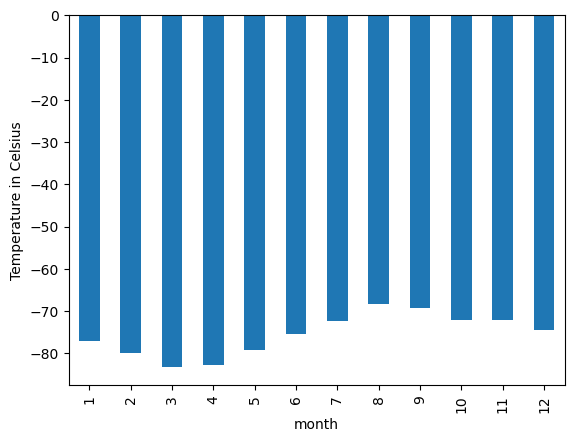

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(10, 5))
average_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (Celsius)')
plt.title('Average Min Temperature by Month on Mars')
plt.show()

In [13]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_min_temp_by_month.idxmin()
warmest_month = average_min_temp_by_month.idxmax()
print(f"\n3. Coldest Month: {coldest_month}\n   Warmest Month: {warmest_month}")


3. Coldest Month: 3
   Warmest Month: 8


In [14]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

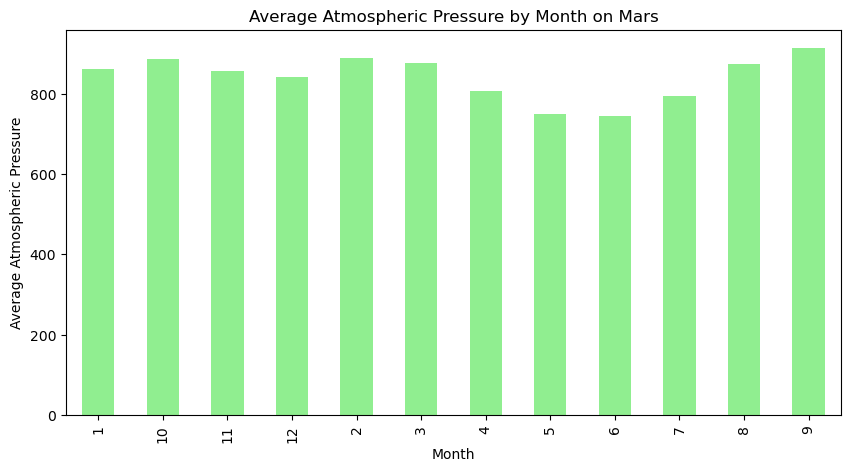

In [15]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
average_pressure_by_month.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show()


5. Terrestrial Days in a Martian Year: 1867


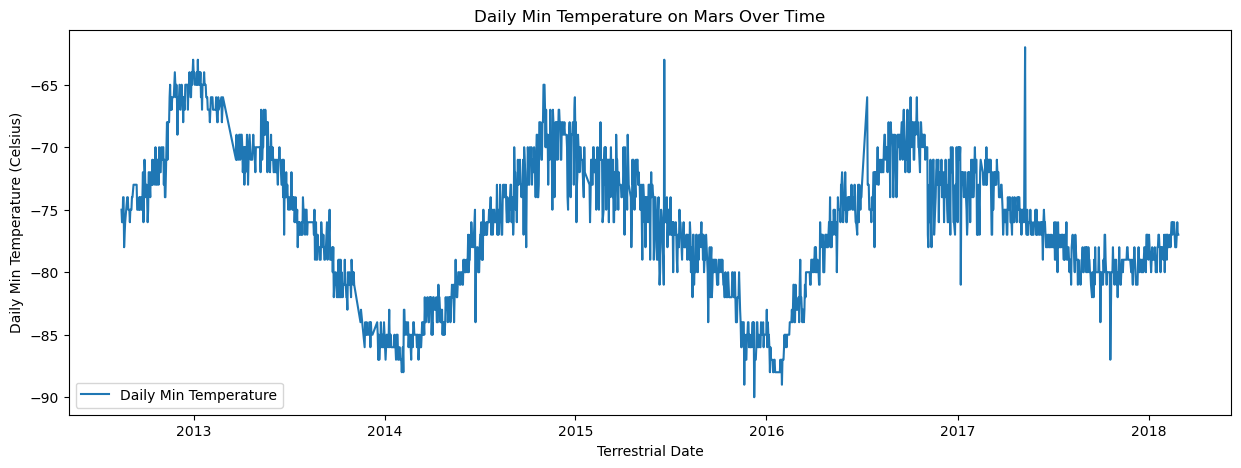

In [17]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days_in_martian_year = df['terrestrial_date'].nunique()
print(f"\n5. Terrestrial Days in a Martian Year: {terrestrial_days_in_martian_year}")

plt.figure(figsize=(15, 5))
plt.plot(df['terrestrial_date'], df['min_temp'], label='Daily Min Temperature')
plt.xlabel('Terrestrial Date')
plt.ylabel('Daily Min Temperature (Celsius)')
plt.title('Daily Min Temperature on Mars Over Time')
plt.legend()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [18]:
# Write the data to a CSV
df.to_csv('mars_weather_data_analysis.csv', index=False)
print("\nData has been written to mars_weather_data_analysis.csv")


Data has been written to mars_weather_data_analysis.csv


In [19]:
browser.quit()